<DIV ALIGN=CENTER>

# Introduction to Multiple Variable Linear Regression
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

In the [Introduction to Regression][i2r], we covered how to use the
`statsmodel` and `sklearn` libraries to compute a linear regression for
a test data set. In this notebook, we first demonstrate how to compute
fit metrics in both libraries that provide guidance to the quality of the
regression fit. To do this, we reuse the same machinery presented in the
original notebook to compute a regression fit, before quantifying the
efficacy of the fit. Second, we will extend the univariate fit to
perform a regression over multiple variables.

-----
[i2r]: ../../Week1/notebooks/intro2regress.ipynb

In [3]:
%matplotlib inline

# We will ignore any user warnings (in this case from matplotlib, about a deprecation)
import warnings
warnings.filterwarnings("ignore", category=UserWarning )

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", font_scale=2.0)

-----
### Data

As before, we need a function to generate a fake data set. Recall, that
since we randomly generate our data, every time this Notebook is run, we
will get different results. Take advantage of this feature to compare
the different approaches as the underlying data change.

-----

In [4]:
# We define a simple function to fit.

np.random.seed(0)

def theModel(xmin=0, xmax = 1, num=20):
    
    sigma = 0.1

    x = np.linspace(xmin, xmax, num)
    y = 0.25 + 0.5 * x - sigma * np.random.randn(len(x)) - sigma * x **2

    return(x, y)

## Linear Regression

To quantify the efficacy of a linear regression model, we will first
employ `statsmodel` to compute a model fit to our fake data set, before
moving on to the `sklearn` library.

### Statsmodels

[Statsmodels][sm] is a Python library that implements a number of
statistical methodology, often in concert with Pandas. One of the
benefits of the `statsmodel` library, other than its tight integration
with the `pandas` library, is that it will easily calculate and display
a number of _goodness of fit_ measurements. To demonstrate this, we
first repeat the `statsmodel` regression example from the _Introduction
to Regression_ notebook.

-----
[sm]: http://statsmodels.sourceforge.net

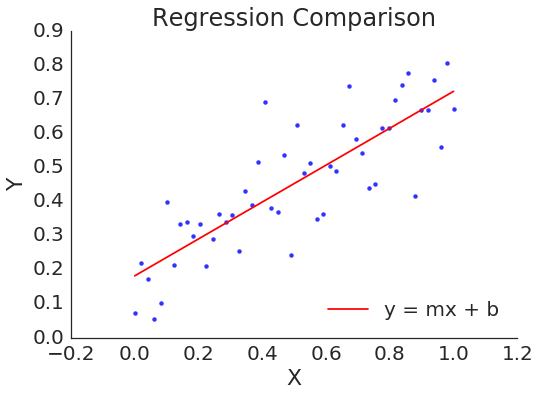

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate fake data
x, y = theModel(num = 50)

# Encapsulate our test data
df = pd.DataFrame({'x': x, 'y': y})

# Implement simple regression: Result ~ Input

# First we fit slope and intercept
result = smf.ols(formula='y ~ x', data=df).fit()

ax = sns.regplot('x', 'y', df, fit_reg=False, color='blue')

# We pick 100 hundred points equally spaced from the min to the max
xfpd = pd.DataFrame({'xfpd': np.linspace(0, 1, 50)})

yfi = result.predict(xfpd)

plt.plot(xfpd['xfpd'], yfi, color='red', label='y = mx + b')

ax.set(xlabel='X', ylabel='Y', title='Regression Comparison')
ax.legend(loc=4)
sns.despine(offset=0, trim=True)

-----

Given a model fit, we simply call the `summary` method
to display fitting parameters, information, and quality metrics. These
different parameters are explained in more detail in the assigned lecture
readings.

-----

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     109.7
Date:                Wed, 27 Jan 2016   Prob (F-statistic):           5.41e-14
Time:                        15:04:28   Log-Likelihood:                 41.549
No. Observations:                  50   AIC:                            -79.10
Df Residuals:                      48   BIC:                            -75.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1817      0.030      6.061      0.000         0.121     0.242
x              0.5412      0.052     10.476      0.000         0.437     0.645
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.071
Skew:                           0.081   Prob(JB):                        0.965
Kurtosis:                       3.088   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----

### Scikit Learn

The most commonly used statistical and machine learning library in
Python is the [scikit learn][skl] library. While we did demonstrate both
linear regression and cross-validation with the `sklearn` library, we
did not explore measurements of the quality of a model fit. To
demonstrate this, we first repeat our cross-validation example, where
we split our data `60:40` into training and testing data, before
computing a linear regression and visually analyzing the result.

-----
[skl]: http://scikit-learn.org/stable/index.html

y = 0.13 + 0.60 x
MSE = 0.015


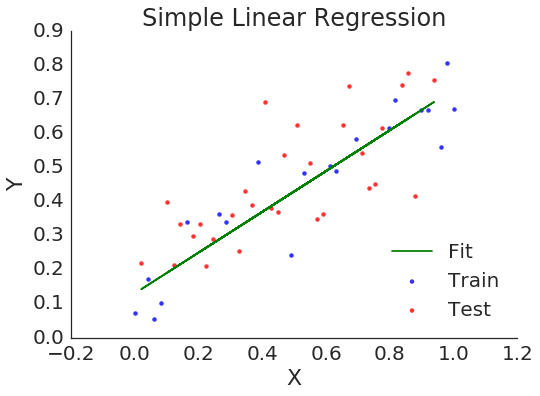

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Ready data set for cross-validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

# Create Model and fit data
model = LinearRegression()
model.fit(x_train[:, np.newaxis], y_train)

# Plot the data and the model prediction
yf = model.predict(x_test[:, np.newaxis])

ax = sns.regplot(x_train, y_train, fit_reg=False, color='blue', label="Train")
ax = sns.regplot(x_test, y_test, fit_reg=False, color='red', label="Test")

ax.set(xlabel='X', ylabel='Y', title='Simple Linear Regression')
plt.plot(x_test, yf, c='g', label="Fit")
ax.legend(loc=4)
sns.despine(offset=0, trim=True)

# Print model and mean squared error from test data.
print("y = {0:4.2f} + {1:4.2f} x".format(model.intercept_, model.coef_[0]))
print("MSE = {0:5.3f}".format(np.mean((yf-y_test)**2)))

-----

#### Fit Metrics

The scikit learn library provides several functions that can be used to
obtain metrics that quantify the quality of the model fit. These
functions are in the [`metrics`][skm] module, and for, [regression
fits][skrm] include the _mean absolute error_ and the _mean squared
error_. The second metric and also be used to compute the _root mean
squared error_, which is a popular fit metric. These three metrics are
all demonstrated in the following code block.

-----
[skm]: http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
[skrm]: http://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [15]:
from sklearn import metrics

print("MAE = {:5.4f}".format(metrics.mean_absolute_error(y_test, yf)))
print("MSE = {:5.4f}".format(metrics.mean_squared_error(y_test, yf)))
print("RMSE = {:5.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, yf))))

MAE = 0.0998
MSE = 0.0153
RMSE = 0.1236


-----

## Multiple Linear Regression

The basic concept of and the Python appraoch to employ linear regression is quite simple, as we have demonstrreated. However, linear regression is actually more powerful than the examples we have demonstrated. First, linear regression is not restricted to one independent variable (i.e., `x`), in fact we can have a number of dependent variables. Second, our regression is not restricted to linear combinations of these dependent variables, only the fit coefficients must be linear. Finally, we can in fact expand this entire appraoch to consider multiple dependent variables (i.e., `y`). 

For this course, we will at this time only explore multiple independent variables. To do so, we first turn to a real world data set, namely the airline data. We first read in the data and peform a simple linear regression before exploring a more complex linear regression model.

-----

In [9]:
# Change this to read a different file, for example
# /home/data_scientist/data/2001.csv on the JupyterHub Server
#
# Note that the JupyterHub server has data from other years in the raw
# subdirectory.
#
filename = '/home/data_scientist/data/2001.csv'

# Read select columns for all rows.

ucs = (1, 2, 4, 14, 15, 16, 17, 18)
cnms = ['Month', 'Day', 'dTime', 'aDelay', 'dDelay', 'Depart', 'Arrive', 'Distance']

alldata = pd.read_csv(filename, header=0, na_values=['NA'], usecols=ucs, names=cnms)

# Now cull out only flights leaving O'hare
local = alldata.loc[alldata['Depart'] == 'ORD'].dropna()
local.describe()

,Month,Day,dTime,aDelay,dDelay,Distance
count,321784.000000,321784.000000,321784.000000,321784.000000,321784.000000,321784.000000
mean,6.354067,15.714224,1386.255721,8.916938,11.812635,769.109138
std,3.382844,8.850686,466.639178,36.284050,31.590608,524.643619
min,1.000000,1.000000,1.000000,-67.000000,-43.000000,67.000000
25%,3.000000,8.000000,1004.000000,-10.000000,-2.000000,334.000000
50%,6.000000,16.000000,1356.000000,-1.000000,0.000000,678.000000
75%,9.000000,23.000000,1811.000000,14.000000,11.000000,925.000000
max,12.000000,31.000000,2400.000000,1473.000000,1477.000000,4243.000000


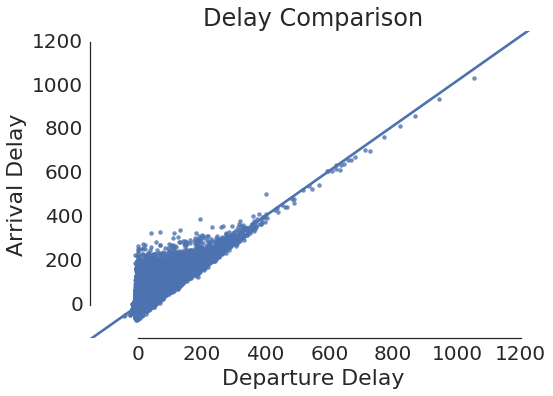

In [16]:
# Make a scatter plot by using seaborn and fit a linear regression

ax = sns.regplot(data=local, x='dDelay', y='aDelay')

ax.set(title='Delay Comparison',
       xlabel='Departure Delay', xlim=(-150, 1250),
       ylabel='Arrival Delay', ylim=(-150, 1250))

sns.despine(offset=0, trim=True)

-----

Clearly there is a fairly strong linear relationship, with large scatter
at small departure delays. This should make sense, since flights can be
much longer than a small departure delay of even ten or twenty minutes.
Our next step is to construct a new DataFrame to hold our feature and
label, add a constant column as before to also fit an intercept before
obtaining our least squares fit. Finally we overplot the data and the
best fit, along with the fit coefficients, showing the best fit line
does not have a zero intercept.

-----

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,-3.1896,0.031,-103.466,0.000,-3.250 -3.129
dDelay,1.0249,0.001,1121.272,0.000,1.023 1.027


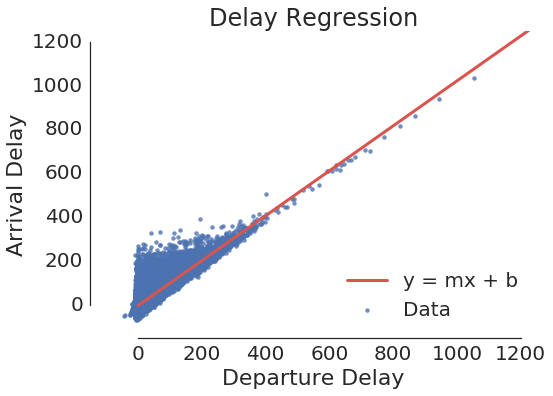

In [12]:
result = smf.ols(formula='aDelay ~ dDelay', data=local).fit()

ax = sns.regplot('dDelay', 'aDelay', local, fit_reg=False, label='Data')

# We pick 100 hundred points equally spaced from the min to the max
xfpd = pd.DataFrame({'dDelay': np.linspace(0, 1500, 50)})

yfi = result.predict(xfpd)

plt.plot(xfpd['dDelay'], yfi, sns.xkcd_rgb["pale red"], lw=3, label='y = mx + b')

ax.set(title='Delay Regression',
       xlabel='Departure Delay', xlim=(-150, 1250),
       ylabel='Arrival Delay', ylim=(-150, 1250))

ax.legend(loc=4)
sns.despine(offset=0, trim=True)

# Display fit parameters
result.summary().tables[1]

-----
### Multiple Independent Variables

To perform a linear regression on multiple independent variables, we
simply modify our `patsy` formula to include the additional variables.
For example, we can perform a linear regression to determine the impact
on _Arrival Delay_ for both the _Departure Delay_ and the _Departure
Time_, as shown below.

-----

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,-2.0456,0.091,-22.478,0.000,-2.224 -1.867
dDelay,1.0278,0.001,1093.044,0.000,1.026 1.030
dTime,-0.0009,6.37e-05,-13.360,0.000,-0.001 -0.001


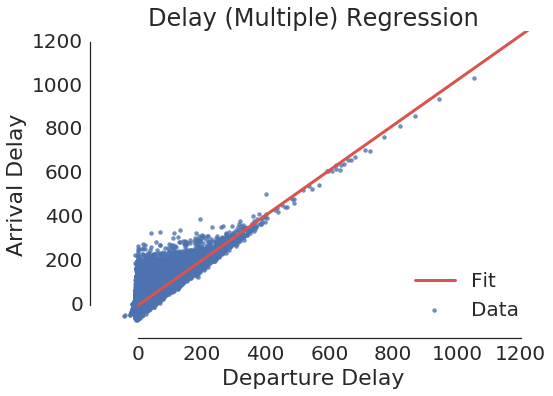

In [17]:
result = smf.ols(formula='aDelay ~ dDelay + dTime', data=local).fit()

ax = sns.regplot('dDelay', 'aDelay', local, fit_reg=False, label='Data')

# We pick 100 hundred points equally spaced from the min to the max
xfpd = pd.DataFrame({'dDelay': np.linspace(0, 1500, 100),
                    'dTime': np.linspace(0, 2400, 100)})

yfi = result.predict(xfpd)

plt.plot(xfpd['dDelay'], yfi, sns.xkcd_rgb["pale red"], lw=3, label='Fit')

ax.set(title='Delay (Multiple) Regression',
       xlabel='Departure Delay', xlim=(-150, 1250),
       ylabel='Arrival Delay', ylim=(-150, 1250))

ax.legend(loc=4)
sns.despine(offset=0, trim=True)


# Display fit parameters
result.summary().tables[1]

-----

We also can perform linear regression on non-linear combinations of
independent variables. For example, we might think that the _Arrival
Delay_ is smaller for longer flights where the pilot has a longer period
of time to make up for a _Departure Delay_. In that case, we might want
to use the square root of the _Distance_, as shown below.

-----

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,-0.1562,0.124,-1.261,0.207,-0.399 0.087
dDelay,1.0283,0.001,1094.130,0.000,1.026 1.030
dTime,-0.0009,6.36e-05,-13.940,0.000,-0.001 -0.001
np.sqrt(Distance),-0.0705,0.003,-22.462,0.000,-0.077 -0.064


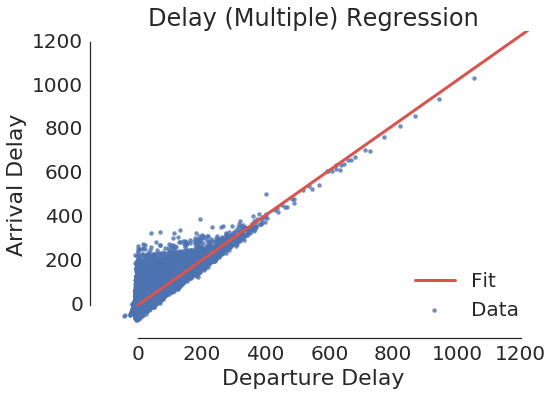

In [18]:
result = smf.ols(formula='aDelay ~ dDelay + dTime + np.sqrt(Distance)', data=local).fit()

ax = sns.regplot('dDelay', 'aDelay', local, fit_reg=False, label='Data')

# We pick 100 hundred points equally spaced from the min to the max
xfpd = pd.DataFrame({'dDelay': np.linspace(0, 1500, 100),
                    'dTime': np.linspace(0, 2400, 100),
                    'Distance': np.linspace(0, 2000, 100)})

yfi = result.predict(xfpd)

plt.plot(xfpd['dDelay'], yfi, sns.xkcd_rgb["pale red"], lw=3, label='Fit')

ax.set(title='Delay (Multiple) Regression',
       xlabel='Departure Delay', xlim=(-150, 1250),
       ylabel='Arrival Delay', ylim=(-150, 1250))

ax.legend(loc=4)
sns.despine(offset=0, trim=True)


# Display fit parameters
result.summary().tables[1]

-----

We can also perform a multiple linear regression by using the `sklearn`
library. In this case, we create an independent variable matrix for our
variables, and fit as normal. 

-----

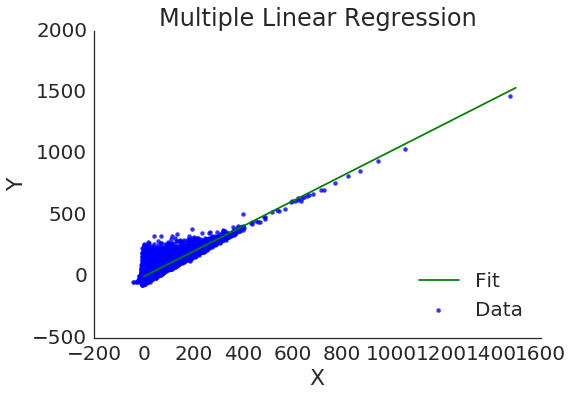

In [19]:
# First extract data, we will simply fit these columns.
x = local[['dDelay', 'dTime', 'Distance']]
y = local.aDelay

# Make fit
model = LinearRegression()
model.fit(x, y)

# Make 'fake' data, we have to transpose the matrix
xf = np.array([np.linspace(0, 1500, 100), np.linspace(0, 2400, 100), np.linspace(0, 2000, 100)]).transpose()

yf = model.predict(xf)

# Plot the data and the model prediction
ax = sns.regplot(data=local, x='dDelay', y='aDelay', fit_reg=False, color='blue', label="Data")

ax.set(xlabel='X', ylabel='Y', title='Multiple Linear Regression')
plt.plot(xf.transpose()[0], yf, c='g', label="Fit")
ax.legend(loc=4)
sns.despine(offset=0, trim=True)